# Fitting

*developed by Pauline Arriaga*

When we interpret any kind of data, our scientific result may be a number that comes from the average of the data points, or it can be some kind of correlation. There are some kinds of correlations in physics we expect. For example, if we are dropping an object from a certain height, we know that the position will be

$x = \frac{1}{2} gt^2$

Therefore, if we measure positions and measure times and plot them, we should see a parabola. However, if we have some systematic errors, meaning some effect of our system that will affect all measurements, we won't get a perfect parabola. We therefore need to fit our data. 

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

Below I'm going to use some functions that will create arrays x_data and y_data which hold some linear data. 

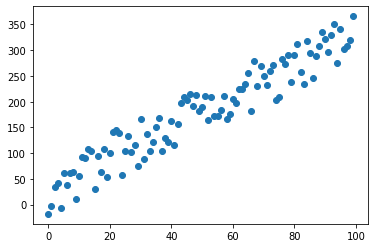

In [ ]:
### Generate a line with random noise

# Generate x and y array for a line
x_data = np.arange(100, dtype = float)
y_data = np.arange(100, dtype = float) * 3. + 30.

# Generate random noise
noise = [random.randint(-50,50) for i in range(100)]
y_data += noise

# Show data
plt.scatter(x_data, y_data)

In order to fit a function, we first need two different functions. One of them will be the function we're trying to fit. Let's try and fit a line to the data points above. We then create a function line() which takes an x coordinate and some parameters as the inputs. We pass in the parameters as an array with the first element being the slope of the line and the second being the y offset. We can have the parameters in any order. Note that below, we have used a doc sting (the text within the quotation marks) in order to tell the reader what the parameters should be. 


The second function will get the residuals of the function. This function can just be a formula for any fitting as it will be the same for any fitting function where we don't have error bars. The get residuals will go point by point on the data points and will find the distance between each data point and the fitted line. The best fit will have the smallest residuals. 

In [ ]:
def line(x, parameters):
  '''
  Plots a line
  
  Inputs:
    x: a coordinate
    parameters: [slope of the line, y offset of the line]
  '''
  m = parameters[0]
  b = parameters[1]
  y = m * x + b
  return y

def get_residuals_line(parameters, data, x):
  residuals = np.abs(data - line(x, parameters))
  return -residuals

We now use the least squares which will maximize the function get residuals, finding the best fit. **Note where x and y data are input**

In [ ]:
from scipy.optimize import least_squares
guess_parameters = [1., 1.] 
res_lsq = least_squares(get_residuals_line, guess_parameters, args = (y_data, x_data))

We now extract the best parameters from the results

In [ ]:
parameters = res_lsq['x']
print(parameters)

[ 3.07778578 28.67960372]


Let's check to see how good our fit is

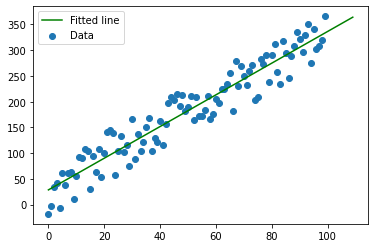

In [ ]:
x_axis = np.arange(110.)
fitted_line = line(x_axis, parameters)
plt.plot(x_axis, fitted_line, color = 'green', label = 'Fitted line')

plt.scatter(x_data, y_data, label = 'Data')

plt.legend()

# Assignment

Simiarly to the previous tutorial, you will create a function, but one that discribes the exponential charging of an RC circuit.

$v = v_0(1-exp(-t/\tau))$

where tau is the RC time constant and v0 is the maximum voltage the circuit will acheive. Use the RC values descirbed in the slides and v0 = 1 V.

In [ ]:
# Create the exponential curve

def rc_exponential(t, parameters):
  '''
  Plots an RC exponential charging curve
  
  Inputs:
    t: time
    parameters: [initial voltage, time constant]
  '''

  return v

def get_residuals_rc(parameters, data, t):
  residuals = np.abs(data - rc_exponential(t, parameters))
  return -residuals

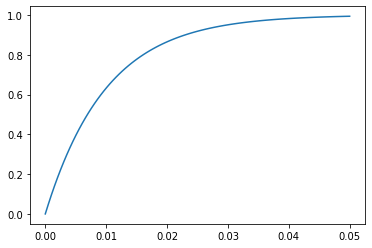

In [ ]:
# Create a time array that is 5 times the length of the time constant



# Call the rc_expnential function and obtain the voltage values




# Plot you theoretical function




Now that you know how to plot a single RC curve, plot the following combinations:

Plot 1: 10 uF Capacitor with 100 Ohm Resistor and 10 uF Capacitor with 1k Ohm Resistor

Plot 2: 1k Ohm Resistor with 10 uF Capacitor and 1k Ohm Resistor with  100 uF Capacitor

To make your graphs look nice and even, choose you time vector to be as a function of the greatest tau value.


In [ ]:
# Plot 1: 10 uF Capacitor with 100 Ohm Resistor and 10 uF Capacitor with 1k Ohm Resistor







In [ ]:
# Plot 2: 1k Ohm Resistor with 10 uF Capacitor and 1k Ohm Resistor with 100 uF Capacitor







Take your RC charge plot you created in the previous python notebook and add 5-10% noise to it. After adding noise to your theoretical plot, create

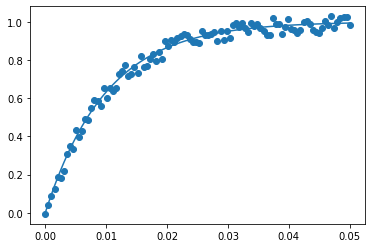

In [ ]:
# Add 5-10% noise to a single theoretical curve and plot it with the actual theoretical curve







Lastly, take your noisy data and fit a the theoretical function back to it.

Plot all 3: Theoretical, Noisy, and Fit. 

Did the input plot paramters change?

[0.9995849  0.01012585]


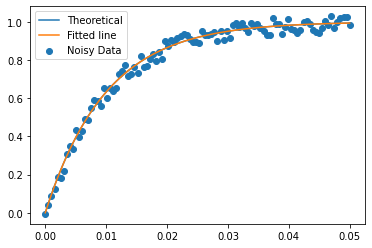

In [ ]:
# Perform least squares fit




# Create a fit curve




# Plot all 3 plots together and show legend





*Developed by P. Arriaga* 

*rev. 2.1 E. Kramer 04-15-2021*

*rev. 2.2 J. Carmona 10-15-2021*

*© Regents of the University of California*
